# 종속변수와 상관성이 있는 변수

'지하철역수' - '사업체수'

## #01. 패키지

In [1]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 군집을 위한 패키지
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [3]:
origin = read_excel("행정동병합테스트22_최종데이터.xlsx")
origin.head()

,시도명,시군구코드,시군구명,행정동코드,행정동코드수정,읍면동명,생성일자,말소일자,지하철역수,의료기관수,...,주차장개소,주차장면수,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,NaN,NaN,11.0,...,668,4592,무,612.0,2154,437,337.55,0.883757,12.240301,0.978054
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,NaN,2.0,75.0,...,362,12605,무,488.0,1808,267,60.79,0.952852,35.399526,2.354708
2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,NaN,NaN,11.0,...,343,2237,무,108.0,626,110,956.51,0.715943,39.839834,2.266277
3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,NaN,NaN,4.0,...,596,3533,유,385.0,1814,311,0.00,0.710363,5.777047,1.081284
4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,NaN,NaN,15.0,...,1617,9390,유,1033.0,3495,491,1.14,0.714284,2.630924,1.576024


## #03. 데이터 살펴보기

In [4]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '행정동코드수정', '읍면동명', '생성일자', '말소일자',
       '지하철역수', '의료기관수', '사회복지시설수', '계(명)', '면적', '구성비', '행정동별공원수', '공공체육시설수',
       '문화시설수', '학교수', '사업체수', '보육시설', '주차장개소', '주차장면수', '하천및한강여부', '아동인구',
       '노인인구', '장애인인구', '세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'],
      dtype='object')

### 이상치, 결측치 확인

In [6]:
tmp = origin.filter(['읍면동명', '사업체수', '지하철역수'])
tmp.head()

,읍면동명,사업체수,지하철역수
0,청운효자동,992.0,NaN
1,사직동,3532.0,2.0
2,삼청동,708.0,NaN
3,부암동,558.0,NaN
4,평창동,747.0,NaN


In [7]:
tmp.isna().sum()

읍면동명       0
사업체수       5
지하철역수    222
dtype: int64

> 지하철 역은 행정동별로 없는 곳도 있기 때문에 결측치를 0으로 설정

In [8]:
tmp = tmp.fillna(0)
tmp.isna().sum()

읍면동명     0
사업체수     0
지하철역수    0
dtype: int64

### 산점도 그래프

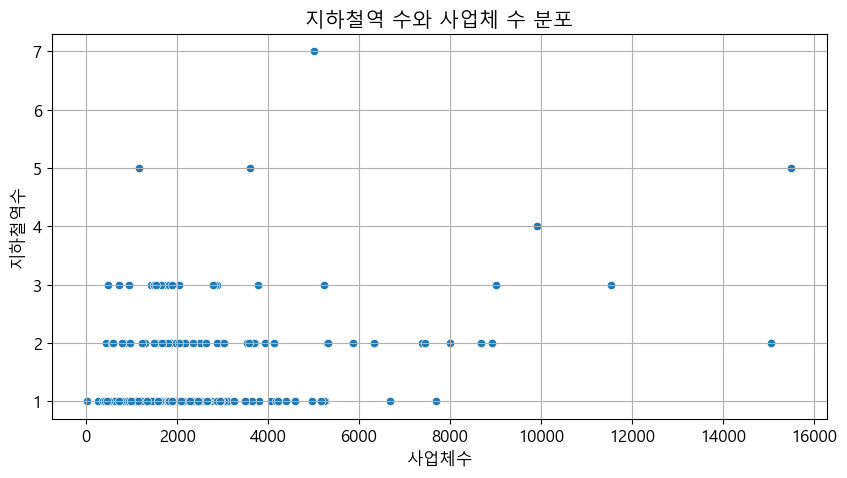

In [9]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='사업체수', y = '지하철역수')
plt.title("지하철역 수와 사업체 수 분포")
plt.xlabel("사업체수")
plt.ylabel("지하철역수")

plt.grid()
plt.show()
plt.close()

## #04. 군집화 모델

### 모델 구현

In [10]:
# X = origin[['사업체수', '행정동내_지하철역수']].values
# X = origin.iloc[:, [origin.columns.get_loc('사업체수'), origin.columns.get_loc('행정동내_지하철역수')]].values

X = tmp.iloc[:,[1,2]].values
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수(극장수, 은행 수)

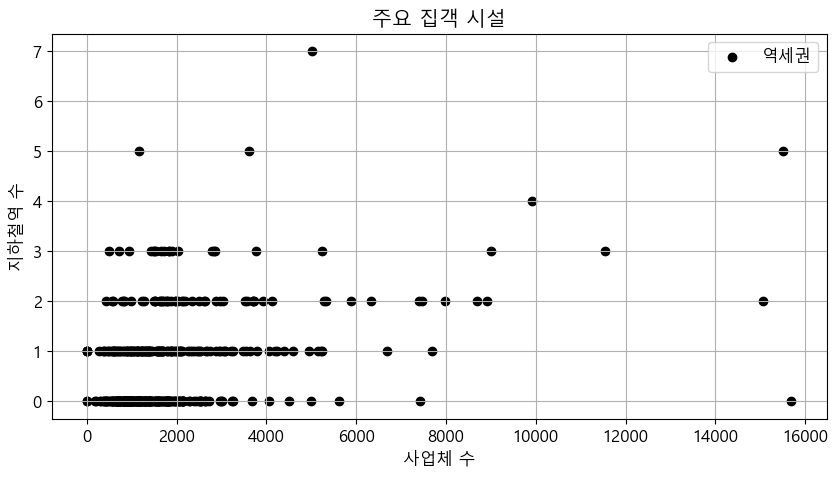

In [11]:
plt.scatter(X[:,0], X[:,1], c='black', label='역세권')
plt.xlabel('사업체 수')
plt.ylabel('지하철역 수')
plt.legend()
plt.title('주요 집객 시설')
plt.grid()
plt.show()
plt.close()

### k값 결정

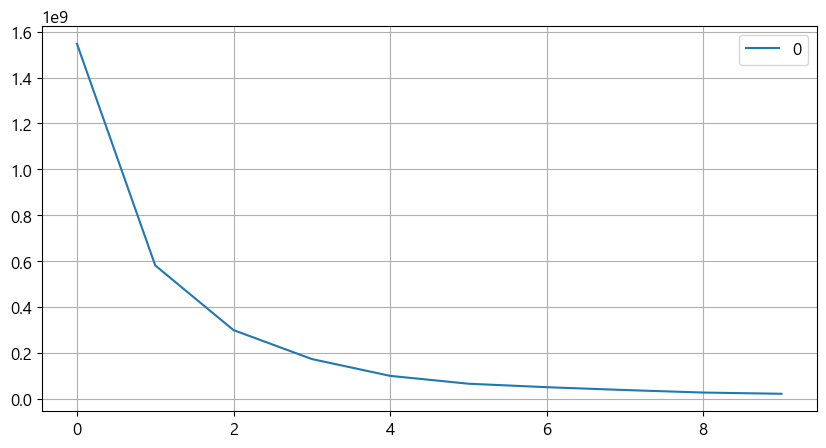

In [12]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()
plt.grid()

> 4이후로 감소폭이 크지 않으므로 k=4로 결정

## #05. K-means clustering

In [13]:
kmeans = KMeans(n_clusters=4).fit(X) #군집 4개로 나누겠다
tmp['클러스터_수치'] = kmeans.labels_
tmp

,읍면동명,사업체수,지하철역수,클러스터_수치
0,청운효자동,992.0,0.0,0
1,사직동,3532.0,2.0,3
2,삼청동,708.0,0.0,0
3,부암동,558.0,0.0,0
4,평창동,747.0,0.0,0
...,...,...,...,...
421,성내제2동,1889.0,3.0,0
422,성내제3동,2451.0,1.0,3
423,길동,5153.0,1.0,1
424,둔촌제1동,15.0,1.0,0


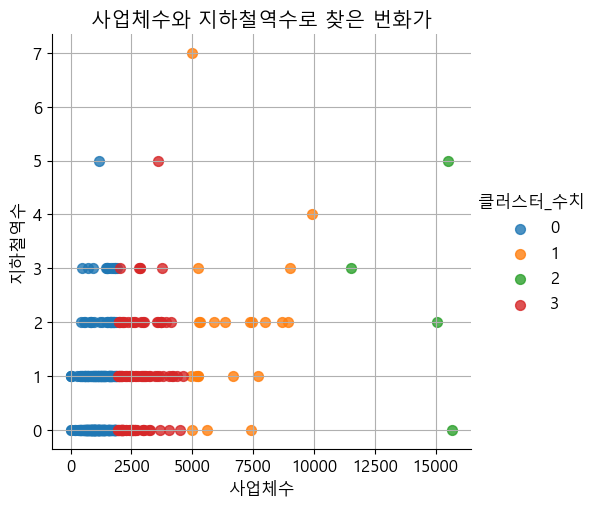

In [21]:
sb.lmplot(x='사업체수', y='지하철역수', data=tmp, fit_reg=False, scatter_kws={"s": 50}, hue="클러스터_수치")
plt.title("사업체수와 지하철역수로 찾은 번화가")
plt.grid()

In [16]:
tmp[tmp['클러스터_수치']==0]

,읍면동명,사업체수,지하철역수,클러스터_수치
0,청운효자동,992.0,0.0,0
2,삼청동,708.0,0.0,0
3,부암동,558.0,0.0,0
4,평창동,747.0,0.0,0
5,무악동,577.0,0.0,0
...,...,...,...,...
417,천호제1동,1564.0,0.0,0
419,천호제3동,1879.0,0.0,0
421,성내제2동,1889.0,3.0,0
424,둔촌제1동,15.0,1.0,0


In [17]:
tmp[tmp['클러스터_수치']==1]

,읍면동명,사업체수,지하철역수,클러스터_수치
9,종로5.6가동,7389.0,2.0,1
18,회현동,9002.0,3.0,1
19,명동,6681.0,1.0,1
22,광희동,8682.0,2.0,1
23,을지로동,8923.0,2.0,1
40,한강로동,5006.0,7.0,1
62,성수2가제3동,5617.0,0.0,1
80,용신동,5236.0,3.0,1
214,서교동,9910.0,4.0,1
251,가양제1동,5242.0,1.0,1


>1번이 가장 이상적인 역세권

In [18]:
tmp[tmp['클러스터_수치']==2]

,읍면동명,사업체수,지하철역수,클러스터_수치
8,종로1.2.3.4가동,15501.0,5.0,2
24,신당동,11544.0,3.0,2
276,가산동,15057.0,2.0,2
368,역삼제1동,15691.0,0.0,2


In [19]:
tmp[tmp['클러스터_수치']==3]

,읍면동명,사업체수,지하철역수,클러스터_수치
1,사직동,3532.0,2.0,3
12,창신제1동,2245.0,1.0,3
17,소공동,3792.0,1.0,3
20,필동,2960.0,2.0,3
45,한남동,3706.0,2.0,3
...,...,...,...,...
401,잠실본동,3012.0,0.0,3
405,잠실제6동,2649.0,1.0,3
418,천호제2동,3676.0,0.0,3
420,성내제1동,2086.0,1.0,3
